# Importing Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from matplotlib import pyplot as plt
%matplotlib inline
from os import listdir
from os.path import isfile, join

# Function to Create a new dataframe

In [2]:
def create_empty_df():
    df = pd.DataFrame()
    df['area'] = None
    df['perimeter'] = None
    df['red_mean'] = None
    df['green_mean'] = None
    df['blue_mean'] = None
    df['f1'] = None
    df['f2'] = None
    df['red_std'] = None
    df['green_std'] = None
    df['blue_std'] = None
    df['f4'] = None
    df['f5'] = None
    df['f6'] = None
    df['f7'] = None
    df['f8'] = None
    df['label'] = None
    return df

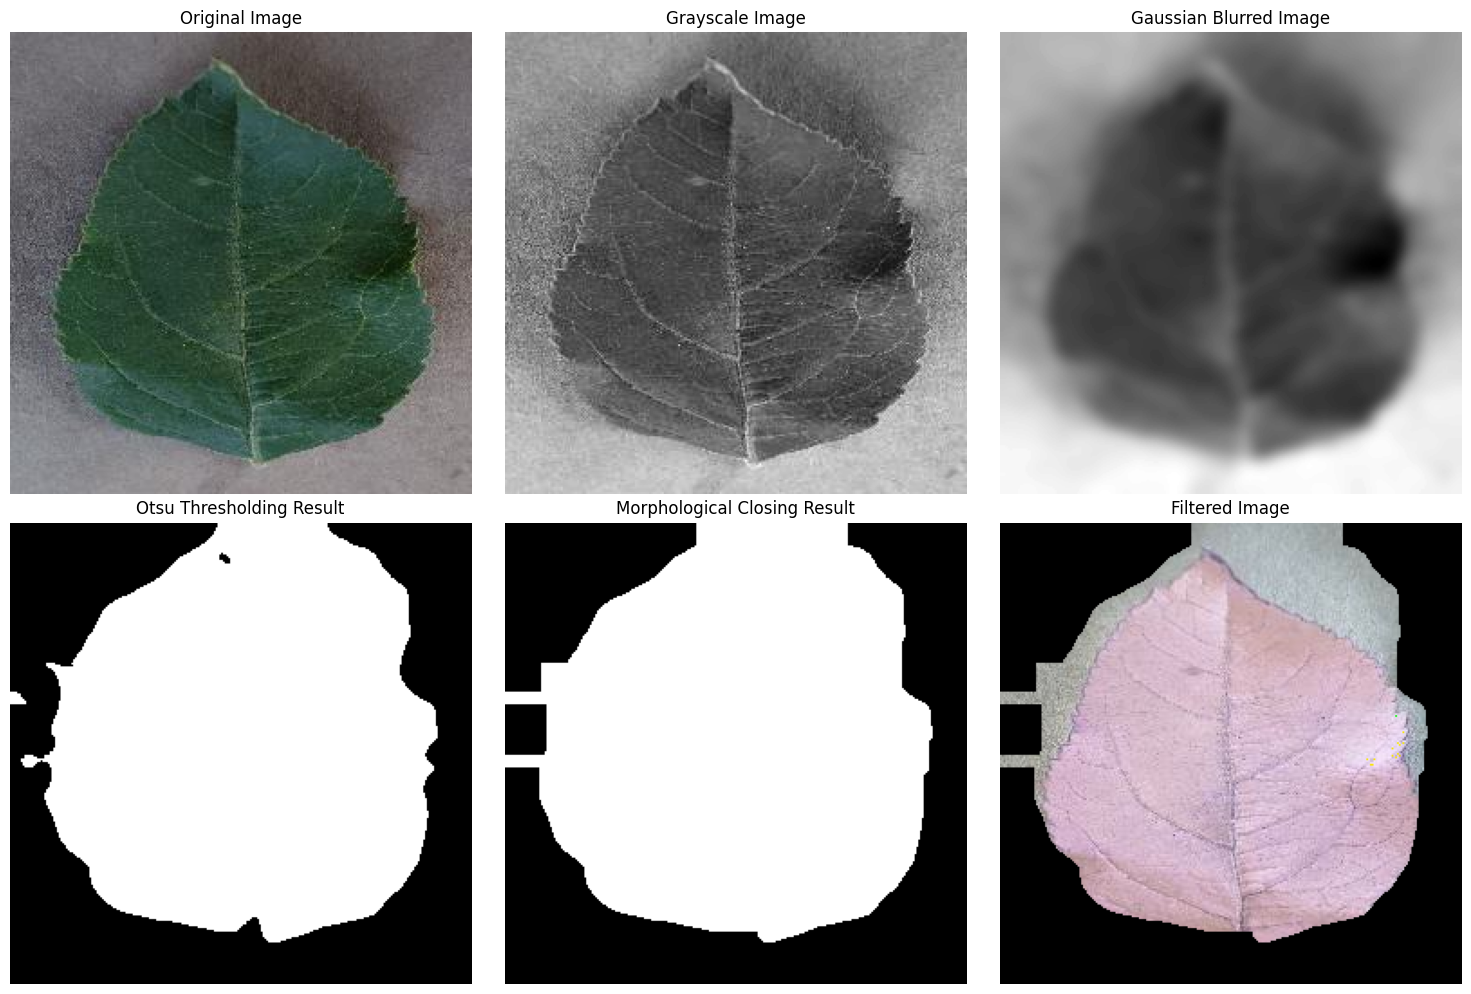

Feature vector: [39640.0, 870.0142792463303, 79.66084289550781, 92.29702758789062, 84.2158203125, 0.24, 0.76, 39.18522801580789, 27.220761930570237, 35.41945083595237, 1387.3173290321085, 27.587006920415195, 1.8671651732550176, 1.5281427822459248, 3.9193704388481114]


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

def show_images(images, titles, rows, cols, figsize=(15, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if rows == 1:
            ax = axes[i]
        else:
            ax = axes[i // cols, i % cols]
        ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)  # Use grayscale colormap for 2D images
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def feature_extractor(filename):
    '''
    Input params: 
    filename : path of the file that we want to process (assuming it's 'image.jpg')

    Output params:
    l : Feature vector
    '''

    # Use the specified filename (assuming it's 'image.jpg')
    filename = 'image.jpg'

    try:
        main_img = cv2.imread(filename)
        img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)

    except:
        return "Invalid"

    # Preprocessing
    gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur to the grayscale image
    blur_radius = 25  # Radius of the Gaussian blur kernel
    blurred_gs = cv2.GaussianBlur(gs, (blur_radius, blur_radius), 0)

    # Perform Otsu's thresholding on the blurred image
    ret_otsu, im_bw_otsu = cv2.threshold(blurred_gs, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    kernel = np.ones((25, 25), np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    # Shape features
    contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    if area == 0:
        return "Invalid"
    perimeter = cv2.arcLength(cnt, True)

    # Apply binary mask to original image
    filtered_image = closing.astype(np.uint8)  # Convert to uint8
    current_frame = main_img.astype(np.float32)  # Convert main_img to float32
    current_frame[..., 0] *= filtered_image
    current_frame[..., 1] *= filtered_image
    current_frame[..., 2] *= filtered_image
    filtered_img_rgb = current_frame.astype(np.uint8)  # Convert back to uint8
    filtered_img_rgb = cv2.cvtColor(filtered_img_rgb, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Color features
    red_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    blue_channel = img[:, :, 2]

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)
    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    # Amount of green color in the image
    gr = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_bound = (30, 0, 0)  # Lower bound for green in HSV
    upper_bound = (70, 255, 255)  # Upper bound for green in HSV
    mask = cv2.inRange(gr, lower_bound, upper_bound)
    ratio_green = cv2.countNonZero(mask) / (img.size / 3)
    f1 = np.round(ratio_green, 2)
    f2 = 1 - f1

    # Texture features using gray level co-occurrence matrix (GLCM)
    img_gray = cv2.cvtColor(filtered_img_rgb, cv2.COLOR_RGB2GRAY)
    g = graycomatrix(img_gray, [1], [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4])

    contrast = graycoprops(g, 'contrast')
    f4 = np.sum(contrast[0])

    dissimilarity = graycoprops(g, prop='dissimilarity')
    f5 = np.sum(dissimilarity[0])

    homogeneity = graycoprops(g, prop='homogeneity')
    f6 = np.sum(homogeneity[0])

    energy = graycoprops(g, prop='energy')
    f7 = np.sum(energy[0])

    correlation = graycoprops(g, prop='correlation')
    f8 = np.sum(correlation[0])

    # Display all images in a single block
    images = [img, gs, blurred_gs, im_bw_otsu, closing, filtered_img_rgb]
    titles = ['Original Image', 'Grayscale Image', 'Gaussian Blurred Image', 
              'Otsu Thresholding Result', 'Morphological Closing Result', 'Filtered Image']
    show_images(images, titles, rows=2, cols=3)  # Display images in a 2x3 grid
8
    # Construct the feature vector
    l = [area, perimeter, red_mean, green_mean, blue_mean,
         f1, f2, red_std, green_std, blue_std,
         f4, f5, f6, f7, f8]

    return l

# Call the feature_extractor function with the predefined image file 'image.jpg'
feature_vector = feature_extractor('image1.jpg')
print("Feature vector:", feature_vector)


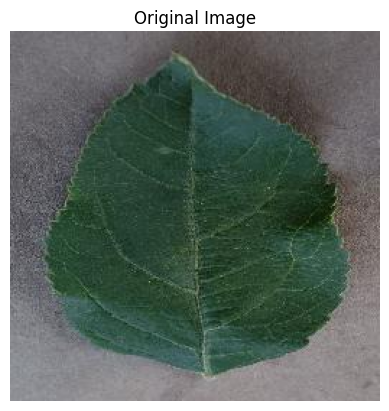

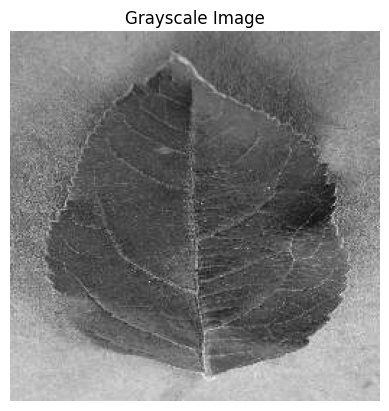

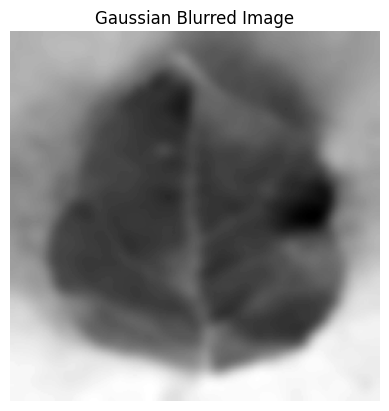

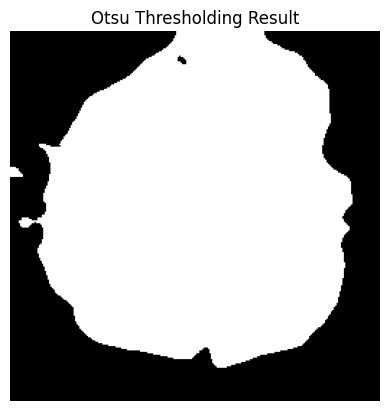

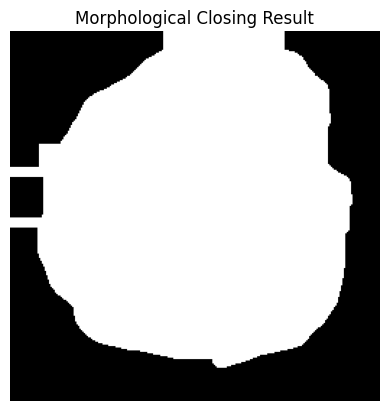

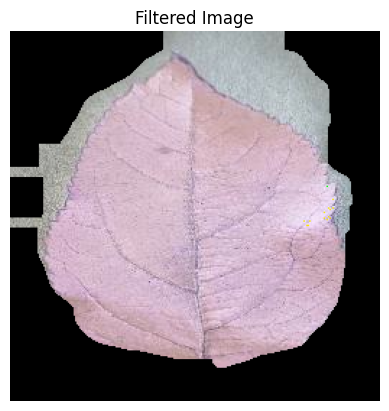

Feature vector: [39640.0, 870.0142792463303, 79.66084289550781, 92.29702758789062, 84.2158203125, 0.24, 0.76, 39.18522801580789, 27.220761930570237, 35.41945083595237, 1387.3173290321085, 27.587006920415195, 1.8671651732550176, 1.5281427822459248, 3.9193704388481114]


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

def show_image(img, title):
    plt.imshow(img, cmap='gray')  # Use grayscale colormap for grayscale images
    plt.title(title)
    plt.axis('off')
    plt.show()

def feature_extractor(filename):
    '''
    Input params: 
    filename : path of the file that we want to process (assuming it's 'image.jpg')

    Output params:
    l : Feature vector
    '''

    # Use the specified filename (assuming it's 'image.jpg')
    filename = 'image.jpg'

    try:
        main_img = cv2.imread(filename)
        img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
        show_image(img, 'Original Image')  # Show original image

    except:
        return "Invalid"

    # Preprocessing
    gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    show_image(gs, 'Grayscale Image')  # Show grayscale image

    # Apply Gaussian blur to the grayscale image
    blur_radius = 25  # Radius of the Gaussian blur kernel
    blurred_gs = cv2.GaussianBlur(gs, (blur_radius, blur_radius), 0)
    show_image(blurred_gs, 'Gaussian Blurred Image')  # Show Gaussian blurred image

    # Perform Otsu's thresholding on the blurred image
    ret_otsu, im_bw_otsu = cv2.threshold(blurred_gs, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    show_image(im_bw_otsu, 'Otsu Thresholding Result')  # Show Otsu thresholded image

    kernel = np.ones((25, 25), np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    show_image(closing, 'Morphological Closing Result')  # Show morphologically closed image

    # Shape features
    contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    if area == 0:
        return "Invalid"
    perimeter = cv2.arcLength(cnt, True)

    # Apply binary mask to original image
    filtered_image = closing.astype(np.uint8)  # Convert to uint8
    current_frame = main_img.astype(np.float32)  # Convert main_img to float32
    current_frame[..., 0] *= filtered_image
    current_frame[..., 1] *= filtered_image
    current_frame[..., 2] *= filtered_image
    filtered_img_rgb = current_frame.astype(np.uint8)  # Convert back to uint8
    filtered_img_rgb = cv2.cvtColor(filtered_img_rgb, cv2.COLOR_BGR2RGB)  # Convert to RGB
    show_image(filtered_img_rgb, 'Filtered Image')  # Show filtered image

    # Color features
    red_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    blue_channel = img[:, :, 2]

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)
    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    # Amount of green color in the image
    gr = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_bound = (30, 0, 0)  # Lower bound for green in HSV
    upper_bound = (70, 255, 255)  # Upper bound for green in HSV
    mask = cv2.inRange(gr, lower_bound, upper_bound)
    ratio_green = cv2.countNonZero(mask) / (img.size / 3)
    f1 = np.round(ratio_green, 2)
    f2 = 1 - f1

    # Texture features using gray level co-occurrence matrix (GLCM)
    img_gray = cv2.cvtColor(filtered_img_rgb, cv2.COLOR_RGB2GRAY)
    g = graycomatrix(img_gray, [1], [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4])

    contrast = graycoprops(g, 'contrast')
    f4 = np.sum(contrast[0])

    dissimilarity = graycoprops(g, prop='dissimilarity')
    f5 = np.sum(dissimilarity[0])

    homogeneity = graycoprops(g, prop='homogeneity')
    f6 = np.sum(homogeneity[0])

    energy = graycoprops(g, prop='energy')
    f7 = np.sum(energy[0])

    correlation = graycoprops(g, prop='correlation')
    f8 = np.sum(correlation[0])

    # Construct the feature vector
    l = [area, perimeter, red_mean, green_mean, blue_mean,
         f1, f2, red_std, green_std, blue_std,
         f4, f5, f6, f7, f8]

    return l

# Call the feature_extractor function with the predefined image file 'image.jpg'
feature_vector = feature_extractor('image1.jpg')
print("Feature vector:", feature_vector)
